# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In your upcoming project, you will download pre-computed bottleneck features.  In this notebook, we'll show you how to calculate VGG-16 bottleneck features on a toy dataset.  Note that unless you have a powerful GPU, computing the bottleneck features takes a significant amount of time.

### 1. Load and Preprocess Sample Images

Before supplying an image to a pre-trained network in Keras, there are some required preprocessing steps.  You will learn more about this in the project; for now, we have implemented this functionality for you in the first code cell of the notebook.  We have imported a very small dataset of 8 images and stored the  preprocessed image input as `img_input`.  Note that the dimensionality of this array is `(8, 224, 224, 3)`.  In this case, each of the 8 images is a 3D tensor, with shape `(224, 224, 3)`.

In [1]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import glob

img_paths = glob.glob("images/*.jpg")

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

# calculate the image input. you will learn more about how this works the project!
img_input = preprocess_input(paths_to_tensor(img_paths))

print(img_input.shape)

Using TensorFlow backend.


(8, 224, 224, 3)


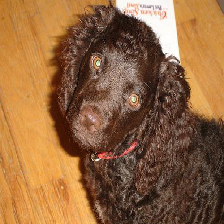

In [4]:
img = image.load_img('images/American_water_spaniel_00648.jpg', target_size=(224, 224))
img

In [7]:
x = image.img_to_array(img)
x.shape
x

array([[[ 182.,  114.,   29.],
        [ 181.,  113.,   30.],
        [ 180.,  113.,   32.],
        ..., 
        [ 123.,   97.,   70.],
        [ 123.,   97.,   80.],
        [ 123.,   97.,   80.]],

       [[ 184.,  116.,   33.],
        [ 187.,  119.,   36.],
        [ 188.,  121.,   42.],
        ..., 
        [ 121.,   97.,   71.],
        [ 122.,   96.,   79.],
        [ 122.,   96.,   79.]],

       [[ 183.,  115.,   32.],
        [ 188.,  120.,   39.],
        [ 190.,  123.,   44.],
        ..., 
        [ 118.,   98.,   74.],
        [ 120.,   95.,   75.],
        [ 120.,   95.,   75.]],

       ..., 
       [[ 232.,  154.,   72.],
        [ 226.,  152.,   77.],
        [ 222.,  155.,   87.],
        ..., 
        [  53.,   41.,   29.],
        [  55.,   38.,   28.],
        [  53.,   36.,   26.]],

       [[ 230.,  152.,   70.],
        [ 226.,  152.,   77.],
        [ 224.,  157.,   89.],
        ..., 
        [  47.,   35.,   23.],
        [  55.,   35.,   26.],
        [ 

In [9]:
img_input[0]

array([[[ -74.93900299,   -2.77899933,   58.31999969],
        [ -73.93900299,   -3.77899933,   57.31999969],
        [ -71.93900299,   -3.77899933,   56.31999969],
        ..., 
        [ -33.93900299,  -19.77899933,   -0.68000031],
        [ -23.93900299,  -19.77899933,   -0.68000031],
        [ -23.93900299,  -19.77899933,   -0.68000031]],

       [[ -70.93900299,   -0.77899933,   60.31999969],
        [ -67.93900299,    2.22100067,   63.31999969],
        [ -61.93900299,    4.22100067,   64.31999969],
        ..., 
        [ -32.93900299,  -19.77899933,   -2.68000031],
        [ -24.93900299,  -20.77899933,   -1.68000031],
        [ -24.93900299,  -20.77899933,   -1.68000031]],

       [[ -71.93900299,   -1.77899933,   59.31999969],
        [ -64.93900299,    3.22100067,   64.31999969],
        [ -59.93900299,    6.22100067,   66.31999969],
        ..., 
        [ -29.93900299,  -18.77899933,   -5.68000031],
        [ -28.93900299,  -21.77899933,   -3.68000031],
        [ -28.93900

In [21]:
tmp_imgs = paths_to_tensor(img_paths)
tmp_imgs.shape
tmp_imgs[0]

array([[[ 182.,  114.,   29.],
        [ 181.,  113.,   30.],
        [ 180.,  113.,   32.],
        ..., 
        [ 123.,   97.,   70.],
        [ 123.,   97.,   80.],
        [ 123.,   97.,   80.]],

       [[ 184.,  116.,   33.],
        [ 187.,  119.,   36.],
        [ 188.,  121.,   42.],
        ..., 
        [ 121.,   97.,   71.],
        [ 122.,   96.,   79.],
        [ 122.,   96.,   79.]],

       [[ 183.,  115.,   32.],
        [ 188.,  120.,   39.],
        [ 190.,  123.,   44.],
        ..., 
        [ 118.,   98.,   74.],
        [ 120.,   95.,   75.],
        [ 120.,   95.,   75.]],

       ..., 
       [[ 232.,  154.,   72.],
        [ 226.,  152.,   77.],
        [ 222.,  155.,   87.],
        ..., 
        [  53.,   41.,   29.],
        [  55.,   38.,   28.],
        [  53.,   36.,   26.]],

       [[ 230.,  152.,   70.],
        [ 226.,  152.,   77.],
        [ 224.,  157.,   89.],
        ..., 
        [  47.,   35.,   23.],
        [  55.,   35.,   26.],
        [ 

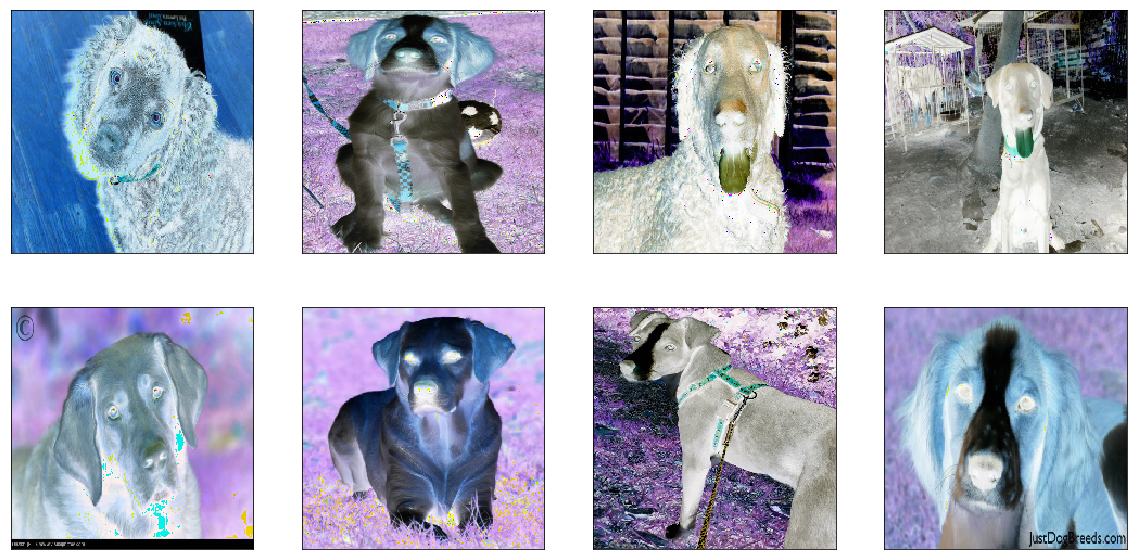

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(tmp_imgs[i])

### 2. Recap How to Import VGG-16

Recall how we import the VGG-16 network (including the final classification layer) that has been pre-trained on ImageNet.

![VGG-16 model](figures/vgg16.png)

In [23]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 264s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

For this network, `model.predict` returns a 1000-dimensional probability vector containing the predicted probability that an image returns each of the 1000 ImageNet categories.  The dimensionality of the obtained output from passing `img_input` through the model is `(8, 1000)`.  The first value of `8` merely denotes that 8 images were passed through the network.

In [24]:
model.predict(img_input).shape

(8, 1000)

In [26]:
model.predict(img_input)

array([[  4.40525706e-11,   1.91909752e-10,   8.05435718e-11, ...,
          6.92545077e-10,   6.79355061e-09,   1.57686575e-08],
       [  2.74487344e-09,   1.21557306e-08,   1.30304156e-10, ...,
          1.41061862e-09,   6.19373424e-08,   5.47934121e-07],
       [  5.61367723e-11,   1.61820453e-11,   6.33974317e-10, ...,
          1.38993664e-10,   2.28668529e-09,   2.84613555e-09],
       ..., 
       [  3.72469060e-07,   4.01937541e-08,   2.58773780e-09, ...,
          2.34165327e-07,   1.25777501e-06,   1.79248764e-05],
       [  4.48420714e-08,   1.87344327e-08,   2.06142758e-07, ...,
          9.90870959e-08,   1.26237410e-06,   1.87804162e-05],
       [  3.25426408e-10,   6.10159701e-09,   1.10612741e-09, ...,
          2.51583399e-09,   5.40096678e-08,   1.86485451e-07]], dtype=float32)

### 3. Import the VGG-16 Model, with the Final Fully-Connected Layers Removed

When performing transfer learning, we need to remove the final layers of the network, as they are too specific to the ImageNet database.  This is accomplished in the code cell below.

![VGG-16 model for transfer learning](figures/vgg16_transfer.png)

In [27]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False)
model.summary()

58892288/58889256 [==============================] - 22s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_poo

### 4. Extract Output of Final Max Pooling Layer

Now, the network stored in `model` is a truncated version of the VGG-16 network, where the final three fully-connected layers have been removed.  In this case, `model.predict` returns a 3D array (with dimensions $7\times 7\times 512$) corresponding to the final max pooling layer of VGG-16.  The dimensionality of the obtained output from passing `img_input` through the model is `(8, 7, 7, 512)`.  The first value of `8` merely denotes that 8 images were passed through the network.  

In [29]:
print(model.predict(img_input).shape)

(8, 7, 7, 512)


Then can use numpy.savez and numpy.load to save and load the bottleneck features. https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html

This is exactly how we calculate the bottleneck features for your project!

In [30]:
model.predict(img_input)

array([[[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         ..., 
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   3.52289925e+01,   0.00000000e+00]],

        [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,